In [1086]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [762]:
# 
mainpath = "/Users/ezequielpolacco/Desktop/Data Science/Kaggle/San Francisco Data Employment/"
filename = "Total.csv"
fullpath = mainpath + "/" + filename

In [763]:
sf_data = pd.read_csv(fullpath)

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (2,3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [764]:
sf_data.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,Not Provided,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,Not Provided,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,Not Provided,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,Not Provided,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,Not Provided,326373.19,326373.19,2011


In [765]:
# Check data types of each column
sf_data.dtypes

EmployeeName         object
JobTitle             object
BasePay              object
OvertimePay          object
OtherPay             object
Benefits             object
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
dtype: object

In [766]:
# Check dataset info
sf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312882 entries, 0 to 312881
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      312882 non-null  object 
 1   JobTitle          312882 non-null  object 
 2   BasePay           312882 non-null  object 
 3   OvertimePay       312882 non-null  object 
 4   OtherPay          312882 non-null  object 
 5   Benefits          312882 non-null  object 
 6   TotalPay          312882 non-null  float64
 7   TotalPayBenefits  312882 non-null  float64
 8   Year              312882 non-null  int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 21.5+ MB


In [767]:
# Check the shape of dataframe
sf_data.shape

(312882, 9)

In [768]:
# The columns "BasePay", "OvertimePay", OtherPay", "Benefits" are in object format. 
# To analyze that we must proceed to convert it in a float type.
pay_list = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']
for item in pay_list:
    sf_data[item] = pd.to_numeric(sf_data[item], errors = "coerce") #If ‘coerce’, then invalid parsing will be set as NaN.

In [769]:
sf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312882 entries, 0 to 312881
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      312882 non-null  object 
 1   JobTitle          312882 non-null  object 
 2   BasePay           312276 non-null  float64
 3   OvertimePay       312881 non-null  float64
 4   OtherPay          312881 non-null  float64
 5   Benefits          276722 non-null  float64
 6   TotalPay          312882 non-null  float64
 7   TotalPayBenefits  312882 non-null  float64
 8   Year              312882 non-null  int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 21.5+ MB


In [770]:
# Check if there are null data
sf_data.empty

False

In [771]:
sf_data.isnull().sum()

EmployeeName            0
JobTitle                0
BasePay               606
OvertimePay             1
OtherPay                1
Benefits            36160
TotalPay                0
TotalPayBenefits        0
Year                    0
dtype: int64

In [772]:
sf_data.tail()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
312877,Daniel W Plautz,Public Service Trainee,0.0,0.0,0.0,0.0,0.0,0.0,2018
312878,David J Thompson,Deputy Sheriff,0.0,0.0,0.0,0.0,0.0,0.0,2018
312879,Keiko Weng Yee Lau,Public Service Trainee,0.0,0.0,0.0,0.0,0.0,0.0,2018
312880,David Wong,Deputy Sheriff,0.0,0.0,0.0,0.0,0.0,0.0,2018
312881,Debora E Howard,Recreation Leader,0.0,0.0,0.0,0.0,0.0,0.0,2018


In [773]:
# For some reason, the x files for year 2018 have 0 values. 
# So, the zero values are not useful for our analysis


In [774]:
zero_basepay = sf_data["BasePay"]==0
zero_basepay.value_counts()

False    309636
True       3246
Name: BasePay, dtype: int64

In [775]:
# There are 3246 zero values for "BasePay". They are replaced by 0.

# Then we replace NaN values for 0.0 in "Benefits"

# Deleted with pd.dropna() method.

#sf_data2 = sf_data.dropna(subset=["BasePay"])
#sf_data2

sf_data["BasePay"] = sf_data["BasePay"].fillna(0)
sf_data["Benefits"] = sf_data["Benefits"].fillna(0)
sf_data

#sf_data.loc[sf_data.Benefits == NaN, "Benefits"] = 0
#sf_data.loc[(sf_data.Benefits == "NaN"),'Benefits'] = 0

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011
...,...,...,...,...,...,...,...,...,...
312877,Daniel W Plautz,Public Service Trainee,0.00,0.00,0.00,0.0,0.00,0.00,2018
312878,David J Thompson,Deputy Sheriff,0.00,0.00,0.00,0.0,0.00,0.00,2018
312879,Keiko Weng Yee Lau,Public Service Trainee,0.00,0.00,0.00,0.0,0.00,0.00,2018
312880,David Wong,Deputy Sheriff,0.00,0.00,0.00,0.0,0.00,0.00,2018


In [776]:
# Payroll analysis

In [777]:
sf_data.describe()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,312882.000000,312881.000000,312881.000000,312882.000000,312882.000000,312882.000000,312882.000000
mean,69673.050600,5668.929393,3460.694974,22125.693989,78802.645788,100928.339777,2014.625303
std,45436.746729,12745.655309,7387.263120,16289.184099,53230.758542,66485.186495,2.290899
min,-474.400000,-292.800000,-7058.590000,-13939.420000,-618.130000,-3628.780000,2011.000000
25%,35342.125000,0.000000,0.000000,2079.272500,38803.000000,48955.072500,2013.000000
50%,67645.970000,0.000000,728.000000,26771.565000,74908.790000,100011.290000,2015.000000
75%,99236.202500,5223.120000,3958.680000,34288.847500,111386.897500,142376.300000,2017.000000
max,592394.340000,309481.030000,400184.250000,125891.730000,592394.340000,712802.360000,2018.000000


In [778]:
# Looking the description, I found negative values.
# Let's check 
sf_data[sf_data["BasePay"]< 0]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
72832,Irwin Sidharta,Junior Clerk,-166.01,249.02,0.00,6.56,83.01,89.57,2012
72865,Robert Scott,Junior Clerk,-121.63,182.70,0.00,5.44,61.07,66.51,2012
72872,Chung Huey Kung,Junior Clerk,-109.22,163.83,0.00,4.32,54.61,58.93,2012
72874,Jordan Li,Junior Clerk,-106.60,159.90,0.00,4.66,53.30,57.96,2012
72878,Richard Jackson,Junior Clerk,-101.88,153.08,0.00,4.55,51.20,55.75,2012
72884,DiMarco McGhee-Stewart,Junior Clerk,-93.14,139.97,0.00,4.17,46.83,51.00,2012
72888,Leopoldo Marasigan,Junior Clerk,-87.38,131.06,0.00,3.89,43.68,47.57,2012
72894,Douglas Avalos,Junior Clerk,-75.67,113.76,0.00,3.39,38.09,41.48,2012
72908,Norma Rodriguez,Junior Clerk,-59.59,89.65,0.00,2.68,30.06,32.74,2012
72920,Charles Williams,Junior Clerk,-30.58,45.87,0.00,1.36,15.29,16.65,2012


In [1332]:
# There are a 13 negative values, that are not useful for our task. 

In [780]:
#Borramos las filas que tienen "BasePay" negativo, ya que no son de utilidad
sf_data.drop(sf_data.loc[sf_data['BasePay']<0].index, inplace=True)

sf_data

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011
...,...,...,...,...,...,...,...,...,...
312877,Daniel W Plautz,Public Service Trainee,0.00,0.00,0.00,0.0,0.00,0.00,2018
312878,David J Thompson,Deputy Sheriff,0.00,0.00,0.00,0.0,0.00,0.00,2018
312879,Keiko Weng Yee Lau,Public Service Trainee,0.00,0.00,0.00,0.0,0.00,0.00,2018
312880,David Wong,Deputy Sheriff,0.00,0.00,0.00,0.0,0.00,0.00,2018


In [849]:
# Reproducimos el procedimiento para las columnas ya que valores negativos no son de utilidad
sf_data.drop(sf_data.loc[sf_data['OvertimePay']<0].index, inplace=True)
sf_data.drop(sf_data.loc[sf_data['OtherPay']<0].index, inplace=True)
sf_data.drop(sf_data.loc[sf_data['Benefits']<0].index, inplace=True)
sf_data.drop(sf_data.loc[sf_data['TotalPay']<0].index, inplace=True)
sf_data.round(2)

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011
...,...,...,...,...,...,...,...,...,...
312877,Daniel W Plautz,Public Service Trainee,0.00,0.00,0.00,0.0,0.00,0.00,2018
312878,David J Thompson,Deputy Sheriff,0.00,0.00,0.00,0.0,0.00,0.00,2018
312879,Keiko Weng Yee Lau,Public Service Trainee,0.00,0.00,0.00,0.0,0.00,0.00,2018
312880,David Wong,Deputy Sheriff,0.00,0.00,0.00,0.0,0.00,0.00,2018


In [782]:
# Calculate the basic stats for "BasePay", "OvertimePay", "OtherPay", "Benefits" columns
sf_data["BasePay"].describe().round(2)
sf_data.describe()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,312817.000000,312816.000000,312816.000000,312817.000000,312817.000000,312817.000000,312817.000000
mean,69683.550274,5669.943701,3460.727238,22129.649692,78814.192025,100943.841717,2014.625209
std,45431.256555,12746.711193,7387.022855,16287.830916,53226.160004,66479.288552,2.290975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2011.000000
25%,35375.180000,0.000000,0.000000,2086.210000,38831.780000,49010.800000,2013.000000
50%,67651.000000,0.000000,728.010000,26773.100000,74917.060000,100024.480000,2015.000000
75%,99251.020000,5224.990000,3958.680000,34290.590000,111392.940000,142384.220000,2017.000000
max,592394.340000,309481.030000,400184.250000,125891.730000,592394.340000,712802.360000,2018.000000


In [1275]:
# What is the average Base Pay for each year?
sf_data.groupby(["Year"]).mean()

,BasePay
Year,
2011,63595.96
2012,65456.02
2013,68516.17
2014,66567.91
2015,68778.05
2016,71230.51
2017,74570.62
2018,76949.41


[Text(0.5, 1.0, 'Average BasePay for each year')]

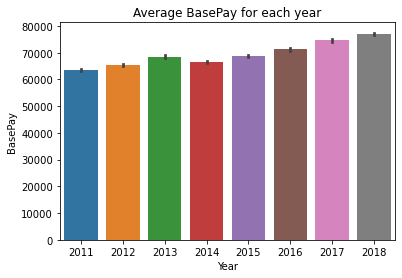

In [785]:
sns.barplot(data = sf_data, x = "Year", y = "BasePay").set(title = "Average BasePay for each year")

In [786]:
# What is the average Total Pay for each year?
sf_data.groupby("Year").mean()["TotalPay"].round(2)

Year
2011    71744.10
2012    74135.43
2013    77619.81
2014    75475.55
2015    77510.24
2016    80567.14
2017    84235.01
2018    87184.03
Name: TotalPay, dtype: float64

[Text(0.5, 1.0, 'Average TotalPay for each year')]

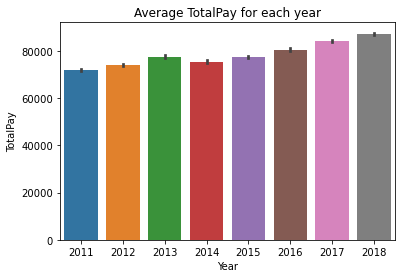

In [787]:
sns.barplot(data = sf_data, x = "Year", y = "TotalPay").set(title = "Average TotalPay for each year")

In [788]:
# What is the average Overtime Pay for each year?
sf_data.groupby("Year").mean()["OvertimePay"].round(2)

Year
2011    4531.07
2012    5024.88
2013    5282.71
2014    5402.28
2015    5607.08
2016    6141.22
2017    6326.00
2018    6747.11
Name: OvertimePay, dtype: float64

[Text(0.5, 1.0, 'Average OvertimePay for each year')]

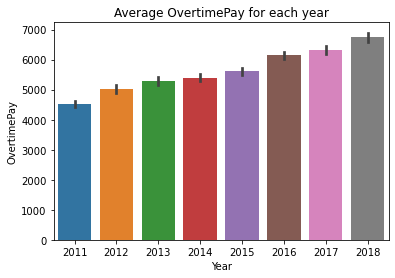

In [789]:
sns.barplot(data = sf_data, x = "Year", y = "OvertimePay").set(title = "Average OvertimePay for each year")

In [790]:
# What is the average Other Pay for each year?
sf_data.groupby("Year").mean()["OtherPay"].round(2)

Year
2011    3617.08
2012    3654.53
2013    3820.93
2014    3505.36
2015    3125.12
2016    3195.64
2017    3338.38
2018    3487.51
Name: OtherPay, dtype: float64

[Text(0.5, 1.0, 'Average OtherPay for each year')]

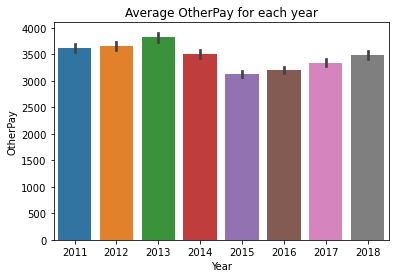

In [791]:
sns.barplot(data = sf_data, x = "Year", y = "OtherPay").set(title = "Average OtherPay for each year")

In [792]:
# What is the average Benefits for each year?
sf_data.groupby("Year").mean()["Benefits"].round(2)

Year
2011        0.00
2012    26447.88
2013    23831.05
2014    24790.90
2015    24218.26
2016    24085.89
2017    25440.14
2018    26293.05
Name: Benefits, dtype: float64

[Text(0.5, 1.0, 'Average Benefits for each year')]

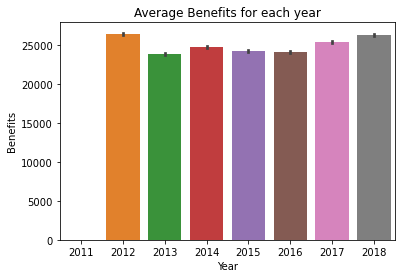

In [793]:
sns.barplot(data = sf_data, x = "Year", y = "Benefits").set(title = "Average Benefits for each year")

In [794]:
sf_data.groupby("Year").max()["BasePay"].round(2)

Year
2011    294580.02
2012    302578.00
2013    319275.01
2014    318835.49
2015    507831.60
2016    527343.14
2017    545294.86
2018    592394.34
Name: BasePay, dtype: float64

[Text(0.5, 1.0, 'Maximum BasePay per each year')]

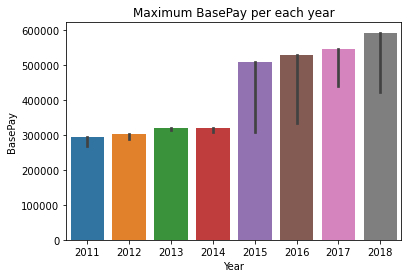

In [329]:
sns.barplot(data = sf_data, x = "Year", y = "BasePay", estimator = max).set(title = "Maximum BasePay per each year")

In [795]:
sf_data.groupby("Year").sum()["BasePay"].apply(lambda x: '%.2f' % x)

Year
2011    2299566191.69
2012    2405835895.72
2013    2576071030.68
2014    2537369199.34
2015    2708892157.55
2016    2916034633.55
2017    3098931365.97
2018    3255498671.71
Name: BasePay, dtype: object

[Text(0.5, 1.0, 'Total BasePay per each year (Thousand of millions)')]

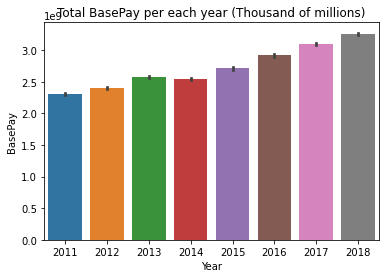

In [796]:
sns.barplot(data = sf_data, x = "Year", y = "BasePay", estimator = sum).set(title = "Total BasePay per each year (Thousand of millions)")

In [797]:
sf_data.groupby("Year").sum()["TotalPay"].apply(lambda x: '%.2f' % x)

Year
2011    2594195051.88
2012    2724847718.55
2013    2918349557.43
2014    2876901577.62
2015    3052818505.65
2016    3298257709.36
2017    3500554111.62
2018    3688494874.71
Name: TotalPay, dtype: object

[Text(0.5, 1.0, 'Total TotalPay per each year (Thousand of millions)')]

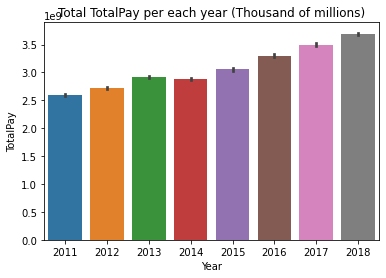

In [798]:
sns.barplot(data = sf_data, x = "Year", y = "TotalPay", estimator = sum).set(title = "Total TotalPay per each year (Thousand of millions)")

In [799]:
sf_data.groupby("Year").sum()["OvertimePay"].apply(lambda x: '%.2f' % x)

Year
2011    163838794.83
2012    184689536.64
2013    198619147.14
2014    205918599.27
2015    220840311.85
2016    251403088.34
2017    262889682.91
2018    285449947.93
Name: OvertimePay, dtype: object

[Text(0.5, 1.0, 'Total OvertimePay per each year (Thousand of millions)')]

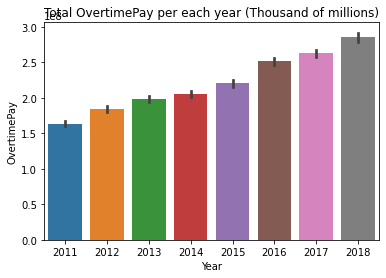

In [800]:
sns.barplot(data = sf_data, x = "Year", y = "OvertimePay", estimator = sum).set(title = "Total OvertimePay per each year (Thousand of millions)")

In [801]:
# Wich year has the maximum mean of BasePay ?

In [802]:
sf_data.groupby("Year").mean()["BasePay"].max()

76949.40959439853

In [803]:
sf_data.groupby("Year").sum()["Benefits"].apply(lambda x: '%.2f' % x)

Year
2011             0.00
2012     972091784.08
2013     895999679.37
2014     944954843.14
2015     953860204.37
2016     986028320.06
2017    1057215691.85
2018    1112380104.82
Name: Benefits, dtype: object

[Text(0.5, 1.0, 'Total Benefits per each year (Thousand of millions)')]

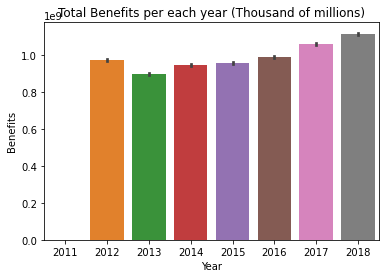

In [804]:
sns.barplot(data = sf_data, x = "Year", y = "Benefits", estimator = sum).set(title = "Total Benefits per each year (Thousand of millions)")

### Medir cuánto crecen los pay. Analizar la varianza, covarianza, desvío

# JOBS

In [805]:
# How many unique JobTitle are in the dataset.
sf_data["JobTitle"].unique()

array(['GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY',
       'CAPTAIN III (POLICE DEPARTMENT)',
       'WIRE ROPE CABLE MAINTENANCE MECHANIC', ...,
       'Tools Room Mechanic/Custodian', 'Pre-Appren Automotive Mechanic',
       'Security-Campus'], dtype=object)

In [806]:
job_group = sf_data.groupby(["JobTitle"])

In [807]:
# How many workers are per JobTitle? Top 5 ranking. In the whole dataset.
sf_data["JobTitle"].value_counts().head(5)

Transit Operator    17995
Special Nurse       10852
Registered Nurse     9249
Firefighter          5891
Custodian            5758
Name: JobTitle, dtype: int64

### How many unique Job Title are there per year?


In [1331]:
unique_jobs_year = sf_data.groupby("Year", as_index = False).nunique()[["Year", "JobTitle"]]
unique_jobs_year

,Year,JobTitle
0,2011,1045
1,2012,1044
2,2013,1051
3,2014,996
4,2015,1010
5,2016,1009
6,2017,1017
7,2018,1000


[Text(0.5, 1.0, 'Unique job title per year')]

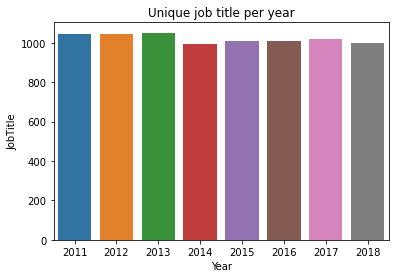

In [1321]:
sns.barplot(data=unique_jobs_year, x = "Year", y = "JobTitle").set(title= "Unique job title per year")

### Cuáles son los trabajos que más crecieron en gente?

### Cuántos trabajadores hubo en cada año?

In [1314]:
# Cuántos trabajadores hubo en cada año?
workers_year = sf_data.groupby("Year", as_index = False)[["JobTitle"]].count()[["Year", "JobTitle"]]
workers_year

,Year,JobTitle
0,2011,36159
1,2012,36755
2,2013,37598
3,2014,38117
4,2015,39386
5,2016,40938
6,2017,41557
7,2018,42307


[Text(0.5, 1.0, 'Total workers number per year')]

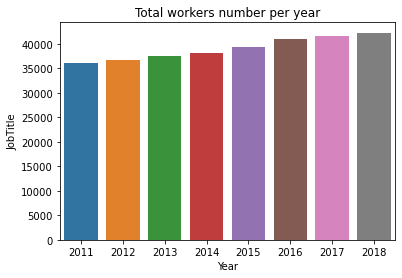

In [1322]:
sns.barplot(data=workers_year, x = "Year", y = "JobTitle").set(title="Total workers number per year")


## JOBS & PAY FOR 2015/16/17/18

###### Análisis por año de los trabajos. Se analiza media del pago base, cantidad de trabajadores.
###### Se pueden aplicar medidas estadísticas para la variabilidad y otros.

In [812]:
# First, let's do a year filter
year_group = sf_data.groupby(["Year"])

# JOBS 2015

In [827]:
year_group.get_group(2015)

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
148650,William J Coaker Jr.,Chief Investment Officer,507831.60,0.00,0.00,125891.73,507831.60,633723.33,2015
148651,Ellen G Moffatt,Asst Med Examiner,279311.10,3829.36,114433.58,72446.93,397574.04,470020.97,2015
148652,Amy P Hart,Asst Med Examiner,279311.03,9046.92,56742.56,75784.61,345100.51,420885.12,2015
148653,Gregory P Suhr,Chief of Police,308901.44,0.00,19354.12,82682.53,328255.56,410938.09,2015
148654,Joanne M Hayes-White,"Chief, Fire Department",303494.81,0.00,24279.58,82294.94,327774.39,410069.33,2015
...,...,...,...,...,...,...,...,...,...
188031,Anau K Pulete,Clerk,0.00,0.00,0.00,1.85,0.00,1.85,2015
188032,Jean M Gorecki,Park Patrol Officer,0.00,0.00,0.00,0.00,0.00,0.00,2015
188033,Rosa L Robinson,Assistant Recreation Director,0.00,0.00,0.00,0.00,0.00,0.00,2015
188034,Neekol Baskin,Senior Clerk,0.00,0.00,0.00,0.00,0.00,0.00,2015


In [844]:
filt = sf_data["Year"] == 2015

In [1045]:
# Cantidad de trabajadores para cada puesto, por año.
df_2015 = sf_data.loc[filt]["JobTitle"].value_counts()
df_2015 = df_2015.to_frame()
df_2015.fillna(0)

,JobTitle
Transit Operator,2737
Special Nurse,1522
Registered Nurse,1304
Public Service Trainee,815
Custodian,805
...,...
Senior Social Worker,1
"Board Scty, MTA",1
Graphics Supervisor,1
Employment & Training Spec 6,1


# JOBS 2016

In [851]:
filt = sf_data["Year"] == 2016
# Cantidad de trabajadores para cada puesto, por año.
df_2016 = sf_data.loc[filt]["JobTitle"].value_counts()
df_2016 = df_2016.to_frame()
df_2016.fillna(0)
df_2016.shape

(1009, 1)

# JOBS 2017

In [852]:
filt = sf_data["Year"] == 2017
# Cantidad de trabajadores para cada puesto, por año.
df_2017 = sf_data.loc[filt]["JobTitle"].value_counts()
df_2017 = df_2017.to_frame()
df_2017.fillna(0)
df_2017.shape

(1017, 1)

# JOBS 2018

In [1239]:
year_group = sf_data.groupby(["Year"])
year_group.get_group(2015)
filt = sf_data["Year"] == 2018
# Cantidad de trabajadores para cada puesto, por año.
df_2018 = sf_data.loc[filt]["JobTitle"].value_counts()

df_2018.fillna(0)
#df_2018.groupby("JobTitle", as_index=False)["JobTitle"].value_counts()
#df_2018 = df_2018.to_frame()

Transit Operator                 2741
Special Nurse                    1633
Registered Nurse                 1445
Firefighter                       914
Public Service Trainee            873
                                 ... 
Orthopedic Technician 1             1
Head Airport Electrician            1
Secretary, Library Commission       1
Gen Mgr, Public Trnsp Dept          1
Claims Process Clerk                1
Name: JobTitle, Length: 1000, dtype: int64

In [1305]:
data18 = year_group["JobTitle"].value_counts().loc[2018]
data18 = data18.to_frame()
data18 = data18.head(10)
data18

,JobTitle
JobTitle,
Transit Operator,2741
Special Nurse,1633
Registered Nurse,1445
Firefighter,914
Public Service Trainee,873
Custodian,854
Police Officer 3,811
Recreation Leader,762
Police Officer,679


<AxesSubplot:xlabel='JobTitle', ylabel='JobTitle'>

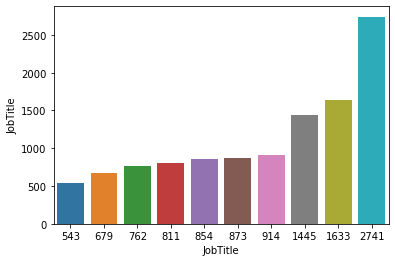

In [1259]:
sns.barplot(data=data18, x = "JobTitle", y = "JobTitle")

# COMPARACIÓN DE TODOS LOS JOBS

In [1303]:
data_jobs = pd.concat([df_2015, df_2016, df_2017, df_2018], axis = 1)
data_jobs.columns = ["2015", "2016", "2017", "2018"]
data_jobs.fillna(0)

,2015,2016,2017,2018
Transit Operator,2737.0,2761.0,2720.0,2741.0
Special Nurse,1522.0,1643.0,1666.0,1633.0
Registered Nurse,1304.0,1360.0,1404.0,1445.0
Public Service Trainee,815.0,906.0,1006.0,873.0
Custodian,805.0,831.0,850.0,854.0
...,...,...,...,...
Metal Fabricator,0.0,0.0,0.0,1.0
Veterans Claims Rep Supervisor,0.0,0.0,0.0,1.0
Assistant Sheriff,0.0,0.0,0.0,1.0
Glazier Supervisor 1,0.0,0.0,0.0,1.0


# GRAFICAR JOBS COMPARATIVA

# PAYROLL ANALYSIS

### Cuál es el promedio de BasePay para cada categoría de trabajo por año?


#### PAYROLL 2015

In [1295]:
pay_2015 = sf_data[(sf_data["Year"] == 2015) & (sf_data["JobTitle"]) & (sf_data["BasePay"])]
pay_2015.drop(["OvertimePay", "OtherPay", "Benefits", "TotalPay", "TotalPayBenefits", "Year"], axis = 1)
#filt = filt.groupby(["JobTitle"])["BasePay"].mean()
pay_2015 = pay_2015.groupby("JobTitle", as_index=False)["BasePay"].mean()[["JobTitle", "BasePay"]]
pay_2015 = pay_2015.head(10)
pay_2015

,JobTitle,BasePay
0,"ACPO,JuvP, Juv Prob (SFERS)",153727.420000
1,ASR Senior Office Specialist,65518.273000
2,ASR-Office Assistant,36399.112353
3,Account Clerk,42716.976543
4,Accountant I,73250.000000
5,Accountant II,68350.848500
6,Accountant II (OCII),65710.030000
7,Accountant III,81890.741513
8,Accountant III (OCII),79423.010000
9,Accountant IV,101112.387656


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'ACPO,JuvP, Juv Prob (SFERS)'),
  Text(1, 0, 'ASR Senior Office Specialist'),
  Text(2, 0, 'ASR-Office Assistant'),
  Text(3, 0, 'Account Clerk'),
  Text(4, 0, 'Accountant I'),
  Text(5, 0, 'Accountant II'),
  Text(6, 0, 'Accountant II (OCII)'),
  Text(7, 0, 'Accountant III'),
  Text(8, 0, 'Accountant III (OCII)'),
  Text(9, 0, 'Accountant IV')])

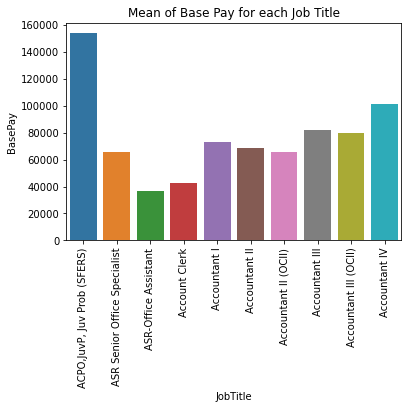

In [1296]:
sns.barplot(data=pay_2015, x = "JobTitle", y = "BasePay").set(title="Mean of Base Pay for each Job Title")
plt.xticks(rotation=90) # Agregar detalles de gráfico

#### PAYROLL 2016

In [1293]:
pay_2016 = sf_data[(sf_data["Year"] == 2016) & (sf_data["JobTitle"]) & (sf_data["BasePay"])]
pay_2016.drop(["OvertimePay", "OtherPay", "Benefits", "TotalPay", "TotalPayBenefits", "Year"], axis = 1)
#filt = filt.groupby(["JobTitle"])["BasePay"].mean()
pay_2016 = pay_2016.groupby("JobTitle", as_index=False)["BasePay"].mean()[["JobTitle", "BasePay"]]
pay_2016 = pay_2016.head(10)
pay_2016

,JobTitle,BasePay
0,"ACPO,JuvP, Juv Prob (SFERS)",168094.740000
1,ASR Senior Office Specialist,70420.763333
2,ASR-Office Assistant,36304.869000
3,Account Clerk,46824.125270
4,Accountant I,14450.000000
5,Accountant II,64346.178367
6,Accountant II (OCII),84534.310000
7,Accountant III,84703.131600
8,Accountant III (OCII),102274.610000
9,Accountant IV,106678.216712


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'ACPO,JuvP, Juv Prob (SFERS)'),
  Text(1, 0, 'ASR Senior Office Specialist'),
  Text(2, 0, 'ASR-Office Assistant'),
  Text(3, 0, 'Account Clerk'),
  Text(4, 0, 'Accountant I'),
  Text(5, 0, 'Accountant II'),
  Text(6, 0, 'Accountant II (OCII)'),
  Text(7, 0, 'Accountant III'),
  Text(8, 0, 'Accountant III (OCII)'),
  Text(9, 0, 'Accountant IV')])

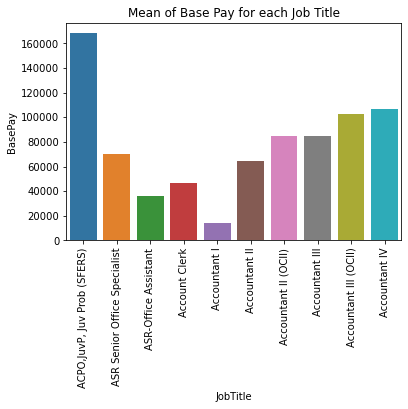

In [1294]:
sns.barplot(data=pay_2016, x = "JobTitle", y = "BasePay").set(title="Mean of Base Pay for each Job Title")
plt.xticks(rotation=90) # Agregar detalles de gráfico

#### PAYROLL 2017

In [1290]:
pay_2017 = sf_data[(sf_data["Year"] == 2017) & (sf_data["JobTitle"]) & (sf_data["BasePay"])]
pay_2017.drop(["OvertimePay", "OtherPay", "Benefits", "TotalPay", "TotalPayBenefits", "Year"], axis = 1)
#filt = filt.groupby(["JobTitle"])["BasePay"].mean()
pay_2017 = pay_2017.groupby("JobTitle", as_index=False)["BasePay"].mean()[["JobTitle", "BasePay"]]
pay_2017 = pay_2017.head(10)
pay_2017

,JobTitle,BasePay
0,"ACPO,JuvP, Juv Prob (SFERS)",180162.030000
1,ASR Senior Office Specialist,66924.614583
2,ASR-Office Assistant,33514.958846
3,Account Clerk,43339.178358
4,Accountant I,21993.600000
5,Accountant II,74376.825208
6,Accountant II (OCII),58271.540000
7,Accountant III,91680.767407
8,Accountant IV,113943.428507
9,Accountant Intern,41632.735128


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'ACPO,JuvP, Juv Prob (SFERS)'),
  Text(1, 0, 'ASR Senior Office Specialist'),
  Text(2, 0, 'ASR-Office Assistant'),
  Text(3, 0, 'Account Clerk'),
  Text(4, 0, 'Accountant I'),
  Text(5, 0, 'Accountant II'),
  Text(6, 0, 'Accountant II (OCII)'),
  Text(7, 0, 'Accountant III'),
  Text(8, 0, 'Accountant IV'),
  Text(9, 0, 'Accountant Intern')])

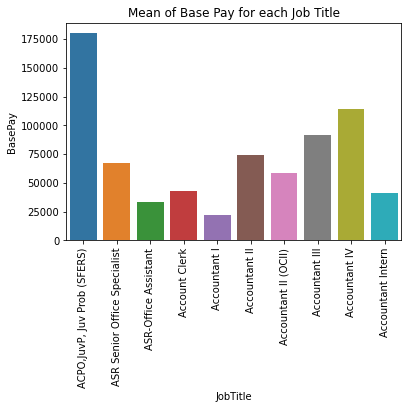

In [1292]:
sns.barplot(data=pay_2017, x = "JobTitle", y = "BasePay").set(title="Mean of Base Pay for each Job Title")
plt.xticks(rotation=90) # Agregar detalles de gráfico

#### PAYROLL 2018

In [1107]:
#filt = sf_data[(sf_data["Year"] == 2018) & (sf_data["JobTitle"]) & (sf_data["BasePay"])]
#df_2018 = sf_data.loc[filt]["BasePay"]
#df_20182 = sf_data.loc[filt]["JobTitle"]
#df_20182 = df_20182.to_frame()
#df_20182.fillna(0)
#df_2018 = df_2018.to_frame()
#df_2018.fillna(0)
#df_2018

#pay_2018 = sf_data[sf_data['Year']==2018][['JobTitle','BasePay']]
#pay_2018
#pay_2018 = pay_2018.groupby(["JobTitle"])["BasePay"].mean()
#pay_2018 = pay_2018.to_frame()
#pay_2018.columns = ["Base Pay MEAN"]
#pay_2018

In [1288]:
#filt = sf_data[(sf_data["Year"] == 2018) & (sf_data["JobTitle"]) & (sf_data["BasePay"])]
#filt.drop(["OvertimePay", "OtherPay", "Benefits", "TotalPay", "TotalPayBenefits", "Year"], axis = 1)
#filt = filt.groupby(["JobTitle"])["BasePay"].mean() ### acá cambiar por .loc
#filt = filt.to_frame()
#filt


In [1298]:
pay_2018 = sf_data[(sf_data["Year"] == 2018) & (sf_data["JobTitle"]) & (sf_data["BasePay"])]
pay_2018.drop(["OvertimePay", "OtherPay", "Benefits", "TotalPay", "TotalPayBenefits", "Year"], axis = 1)
#filt = filt.groupby(["JobTitle"])["BasePay"].mean()
pay_2018 = pay_2018.groupby("JobTitle", as_index=False)["BasePay"].mean()[["JobTitle", "BasePay"]]
pay_2018 = pay_2018.head(10)
pay_2018

,JobTitle,BasePay
0,"ACPO,JuvP, Juv Prob (SFERS)",189352.140000
1,ASR Senior Office Specialist,65777.246538
2,ASR-Office Assistant,45140.480952
3,Account Clerk,52416.667755
4,Accountant I,67771.010000
5,Accountant II,74959.007115
6,Accountant III,89719.272158
7,Accountant IV,117960.278732
8,Accountant Intern,41386.829524
9,Acupuncturist,85676.000000


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'ACPO,JuvP, Juv Prob (SFERS)'),
  Text(1, 0, 'ASR Senior Office Specialist'),
  Text(2, 0, 'ASR-Office Assistant'),
  Text(3, 0, 'Account Clerk'),
  Text(4, 0, 'Accountant I'),
  Text(5, 0, 'Accountant II'),
  Text(6, 0, 'Accountant III'),
  Text(7, 0, 'Accountant IV'),
  Text(8, 0, 'Accountant Intern'),
  Text(9, 0, 'Acupuncturist')])

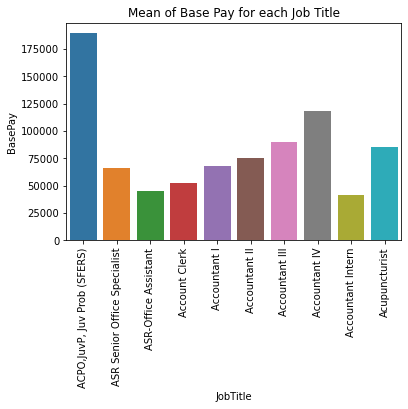

In [1323]:
sns.barplot(data=pay_2018, x = "JobTitle", y = "BasePay").set(title="Mean of Base Pay for each Job Title")
plt.xticks(rotation=90) # Agregar detalles de gráfico

# COMPARACIÓN DE TODOS LOS PAY MEAN

In [1330]:
#data_pay = pd.concat([pay_2015, pay_2016, pay_2017, pay_2018], axis = 1)
#data_pay.columns = ["2015", "2016", "2017", "2018"]
#data_pay.fillna(0)

# ANÁLISIS ESTADÍSTICO DE 2018 - VARIABLES JOBS and PAY

# Todo el dataset VER PARA QUÉ SIRVE TODO ESTO

In [664]:
job_group = sf_data.groupby(["JobTitle"]) # muestra los datos de todo el data set

In [1329]:
job_group["BasePay"].agg(["mean", "median", "count"], ascending=False)

,mean,median,count
JobTitle,,,
ACCOUNT CLERK,43300.806506,49777.780,83
ACCOUNTANT,46643.172000,60076.240,5
ACCOUNTANT INTERN,28732.663958,16806.755,48
"ACPO,JuvP, Juv Prob (SFERS)",150725.422000,168094.740,5
ACUPUNCTURIST,66374.400000,66374.400,1
...,...,...,...
X-RAY LABORATORY AIDE,47664.773077,54066.080,26
X-Ray Laboratory Aide,44744.065146,55246.500,103
"YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS",52609.910000,52609.910,1
